# ultralytics Inference Sandbox

model: https://hub.ultralytics.com/models/1xKPEuwRoyDdwL6uamBI?tab=deploy

In [ ]:
import sys
sys.path.append("../")

from bluer_sandbox import notebooks

import json
import requests
from IPython.display import Image

from bluer_options import string
from bluer_objects import objects

from bluer_sandbox.host import signature
from vancouver_watching import env
from vancouver_watching.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

🌈  vancouver_watching-3.453.1, built on 05 January 2025, 17:40:50


In [4]:
object_name = "2024-02-02-18-26-13-21057"
filename = "georgiaE.jpg"

object_path = objects.object_path(object_name)

In [5]:
assert objects.download(object_name, filename)

download: s3://kamangir/bolt/2024-02-02-18-26-13-21057/georgiaE.jpg to ../../../storage/abcli/2024-02-02-18-26-13-21057/georgiaE.jpg


---

In [6]:
# https://hub.ultralytics.com/models/<model-id>?tab=preview

# model_id = "R6nMlK6kQjSsQ76MPqQM" # default, YOLOv8x (heaviest)

model_id = "1xKPEuwRoyDdwL6uamBI" # YOLOv8n (lightest)

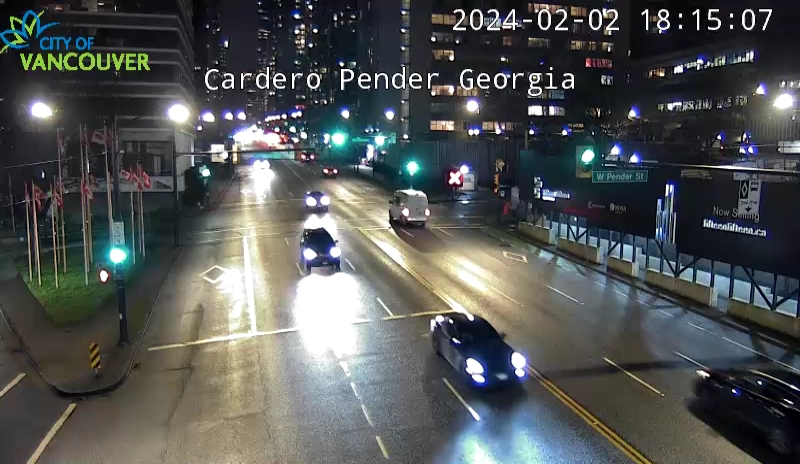

In [7]:
image_filename = os.path.join(object_path, filename)
Image(image_filename)

In [8]:
# https://hub.ultralytics.com/models/1xKPEuwRoyDdwL6uamBI?tab=deploy
url = "https://api.ultralytics.com/v1/predict/R6nMlK6kQjSsQ76MPqQM"
headers = {"x-api-key": env.ULTRALYTICS_API_KEY}
data = {"size": 640, "confidence": 0.25, "iou": 0.45}
with open(image_filename, "rb") as f:
	response = requests.post(url, headers=headers, data=data, files={"image": f})

# Check for successful response
response.raise_for_status()

# Print inference results
print(json.dumps(response.json(), indent=2))

{
  "images": [
    {
      "results": [
        {
          "box": {
            "x1": 428.92056,
            "x2": 528.47382,
            "y1": 311.31018,
            "y2": 390.64734
          },
          "class": 2,
          "confidence": 0.89171,
          "name": "car"
        },
        {
          "box": {
            "x1": 691.67401,
            "x2": 799.70398,
            "y1": 358.07617,
            "y2": 456.28082
          },
          "class": 2,
          "confidence": 0.8053,
          "name": "car"
        },
        {
          "box": {
            "x1": 297.22766,
            "x2": 342.22858,
            "y1": 226.93832,
            "y2": 274.42633
          },
          "class": 2,
          "confidence": 0.79609,
          "name": "car"
        },
        {
          "box": {
            "x1": 301.90082,
            "x2": 330.37521,
            "y1": 190.04588,
            "y2": 212.75455
          },
          "class": 2,
          "confidence": 0.7703,
        

---

In [9]:
# END